In [1]:
%matplotlib inline
import pyfolio as pf

In [2]:
!zipline bundles

quandl <no ingestions>
quantopian-quandl 2017-09-27 10:45:08.190035


In [3]:
import zipline
from zipline.data import benchmarks
from zipline.api import order_target, record, symbol
from zipline.utils.run_algo import run_algorithm
from datetime import datetime
import pytz

In [4]:
#%load_ext zipline

In [4]:
#%%zipline --start 2010-1-1 --end 2016-1-1
#from zipline.api import order_target, record, symbol

small_window = 3
big_window = 5

def initialize(context):
    context.i = 0
    context.asset = symbol('AAPL')


def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < big_window:
        return
    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price', bar_count=small_window, frequency="1d").mean()
    long_mavg = data.history(context.asset, 'price', bar_count=big_window, frequency="1d").mean()

    # Trading logic
    if short_mavg > long_mavg:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(context.asset, 20)
    elif short_mavg < long_mavg:
        order_target(context.asset, -20)

In [5]:
results = run_algorithm(datetime(2010,1,1, tzinfo=pytz.utc), 
                        datetime(2017,1,1, tzinfo=pytz.utc),
                        initialize,
                        10000,
                        handle_data=handle_data)

/usr/local/lib/python3.4/site-packages/empyrical/stats.py:522: RuntimeWarning: invalid value encountered in double_scalars
  sortino = mu / dsr


In [6]:
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(results)

In [7]:
returns[-5:]

2016-12-23 00:00:00+00:00    0.000563
2016-12-27 00:00:00+00:00    0.001687
2016-12-28 00:00:00+00:00    0.001220
2016-12-29 00:00:00+00:00   -0.000049
2016-12-30 00:00:00+00:00   -0.002218
Name: returns, dtype: float64

In [8]:
positions.head()

,Equity(2696 [AAPL]),cash
index,,
2010-01-11 00:00:00+00:00,-4202.2,14201.2
2010-01-12 00:00:00+00:00,-4154.4,14201.2
2010-01-13 00:00:00+00:00,-4213.0,14201.2
2010-01-14 00:00:00+00:00,-4188.6,14201.2
2010-01-15 00:00:00+00:00,-4118.6,14201.2


In [9]:
transactions.tail()

,amount,commission,dt,order_id,price,sid,symbol,txn_dollars
2016-11-30 21:00:00+00:00,40,None,2016-11-30 21:00:00+00:00,e3d662d8fb5943c2b66208197887c1eb,110.52,Equity(2696 [AAPL]),Equity(2696 [AAPL]),-4420.8
2016-12-01 21:00:00+00:00,-40,None,2016-12-01 21:00:00+00:00,d1dcc38c22d3461a9115b76df19202ef,109.49,Equity(2696 [AAPL]),Equity(2696 [AAPL]),4379.6
2016-12-08 21:00:00+00:00,40,None,2016-12-08 21:00:00+00:00,5074cc8a1c5446a7a9d10ffe756e76b5,112.12,Equity(2696 [AAPL]),Equity(2696 [AAPL]),-4484.8
2016-12-27 21:00:00+00:00,-40,None,2016-12-27 21:00:00+00:00,877ef124a43b42b6b270fc97da09660c,117.26,Equity(2696 [AAPL]),Equity(2696 [AAPL]),4690.4
2016-12-29 21:00:00+00:00,40,None,2016-12-29 21:00:00+00:00,422466f1189b4684afd07b32d800862b,116.73,Equity(2696 [AAPL]),Equity(2696 [AAPL]),-4669.2


Entire data start date: 2010-01-04
Entire data end date: 2016-12-30
Backtest months: 83


,Backtest
Annual return,-2.8%
Cumulative returns,-18.1%
Annual volatility,21.7%
Sharpe ratio,-0.02
Calmar ratio,-0.05
Stability,0.47
Max drawdown,-51.8%
Omega ratio,1.00
Sortino ratio,-0.03
Skew,-0.34


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,51.75,2012-04-24,2014-04-23,NaT,NaN
1,19.79,2011-08-08,2012-01-25,2012-03-20,162
2,11.08,2011-04-19,2011-06-23,2011-08-08,80
3,8.60,2010-10-18,2011-03-14,2011-04-19,132
4,6.41,2012-03-26,2012-04-17,2012-04-24,22


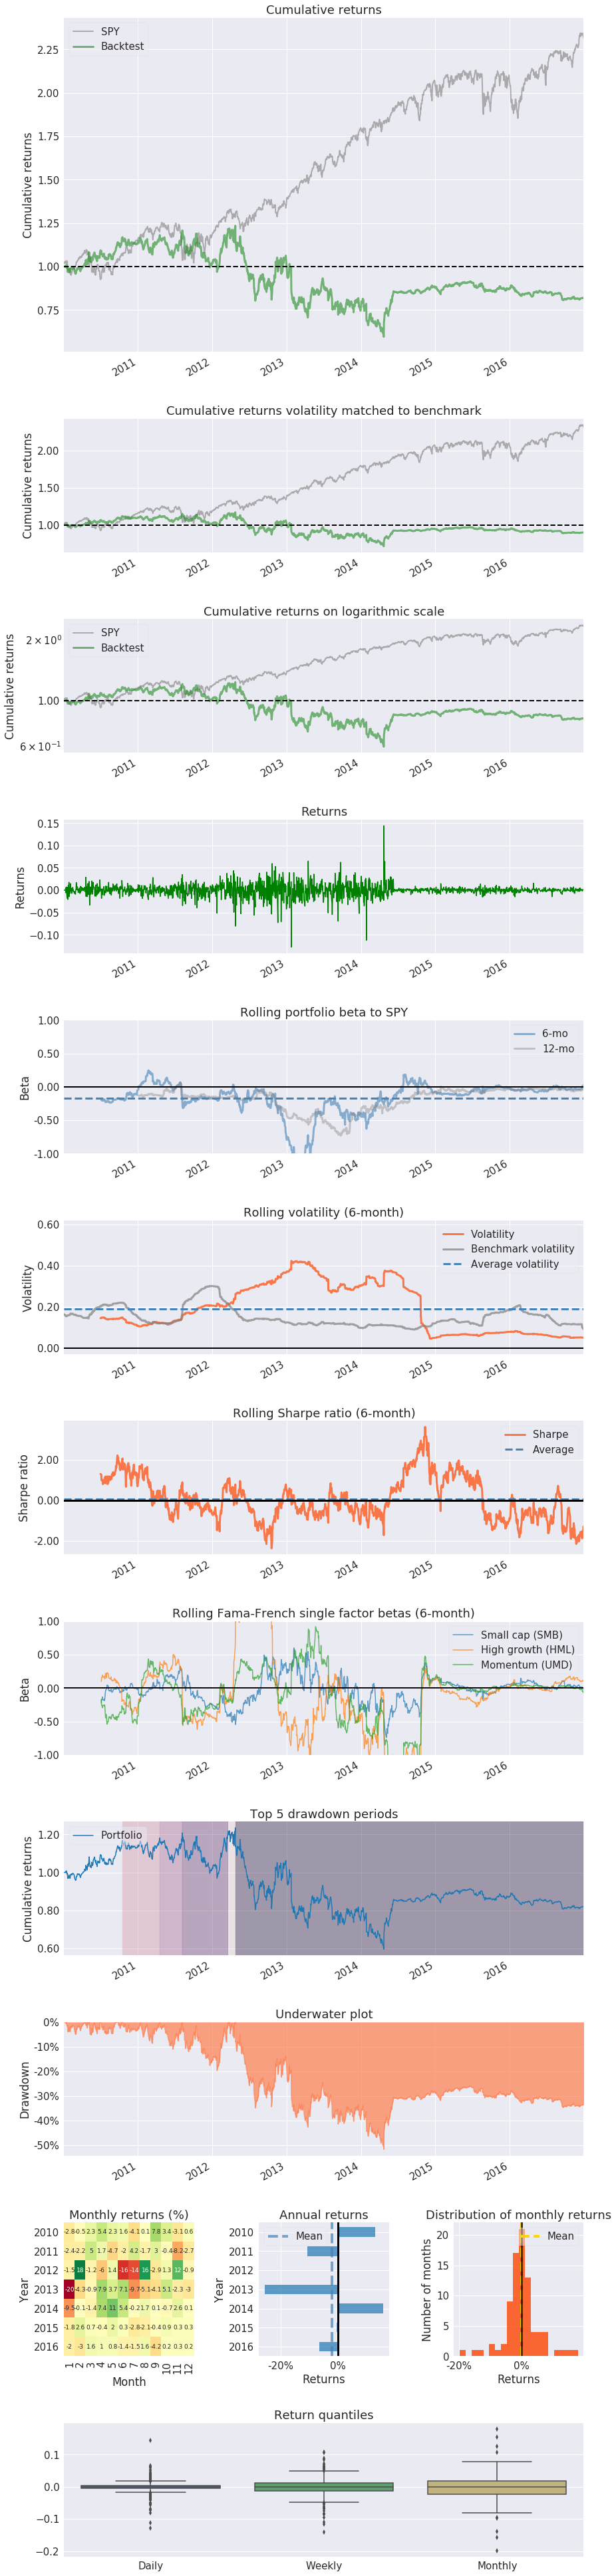

Stress Events,mean,min,max
US downgrade/European Debt Crisis,-0.37%,-3.44%,3.50%
Fukushima,0.30%,-1.52%,2.83%
EZB IR Event,-0.29%,-3.71%,4.04%
Flash Crash,-0.01%,-3.35%,1.96%
Apr14,0.40%,-2.55%,14.44%
Oct14,-0.03%,-0.64%,0.44%
Fall2015,-0.15%,-1.55%,1.07%
Recovery,0.01%,-8.05%,5.97%
New Normal,-0.01%,-12.76%,14.44%


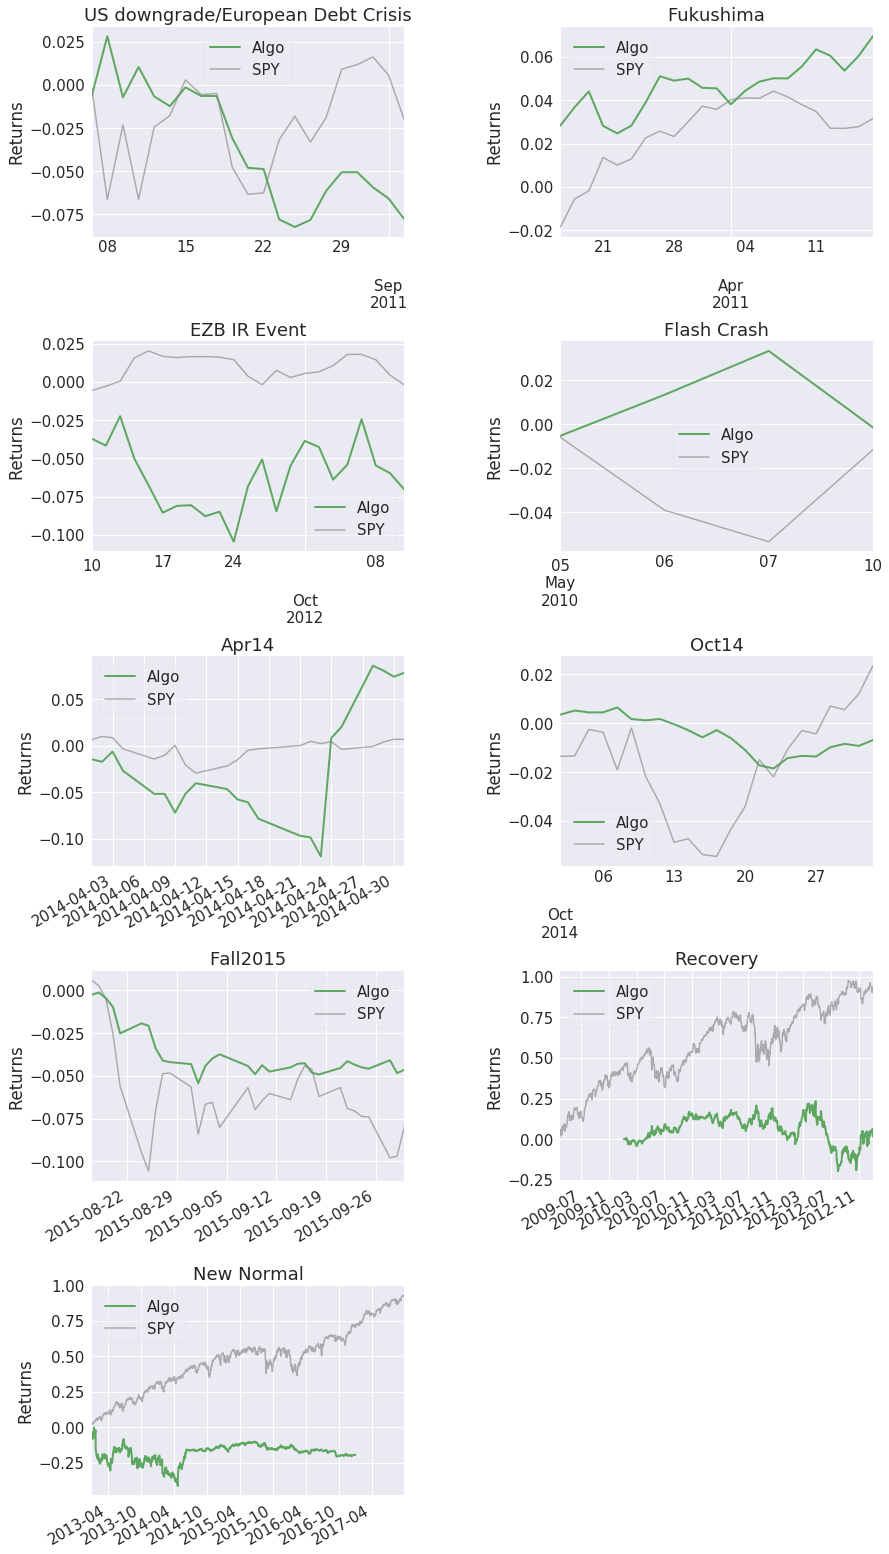

Top 10 long positions of all time,max
AAPL,176.18%


Top 10 short positions of all time,max
AAPL,-173.94%


Top 10 positions of all time,max
AAPL,176.18%


All positions ever held,max
AAPL,176.18%


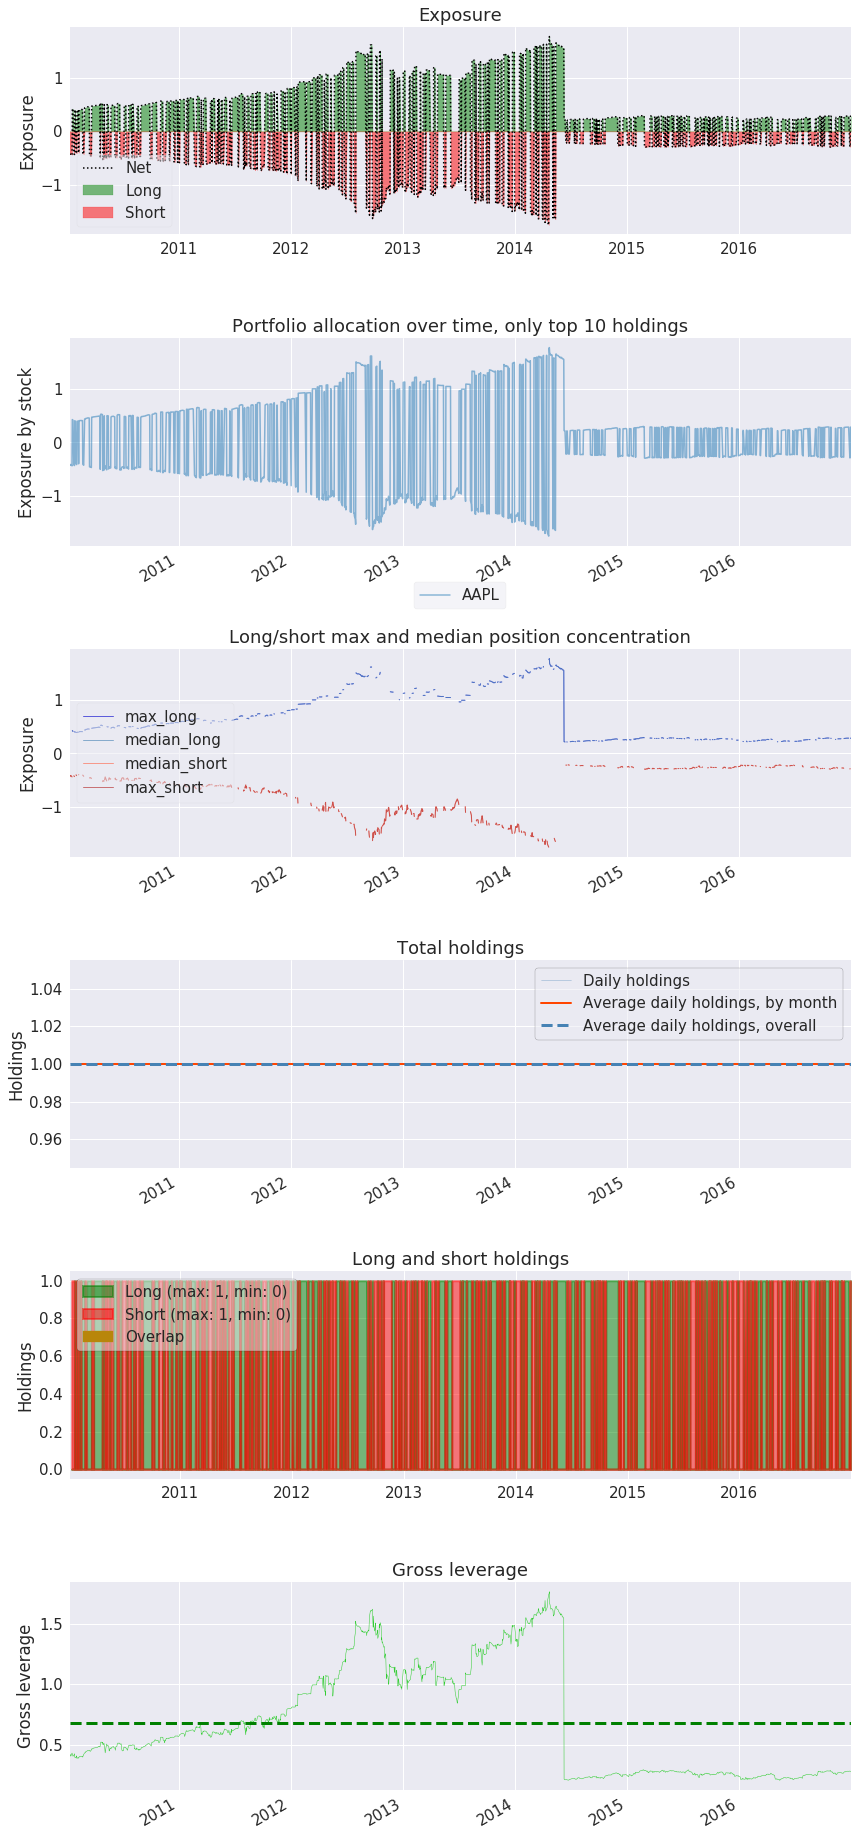

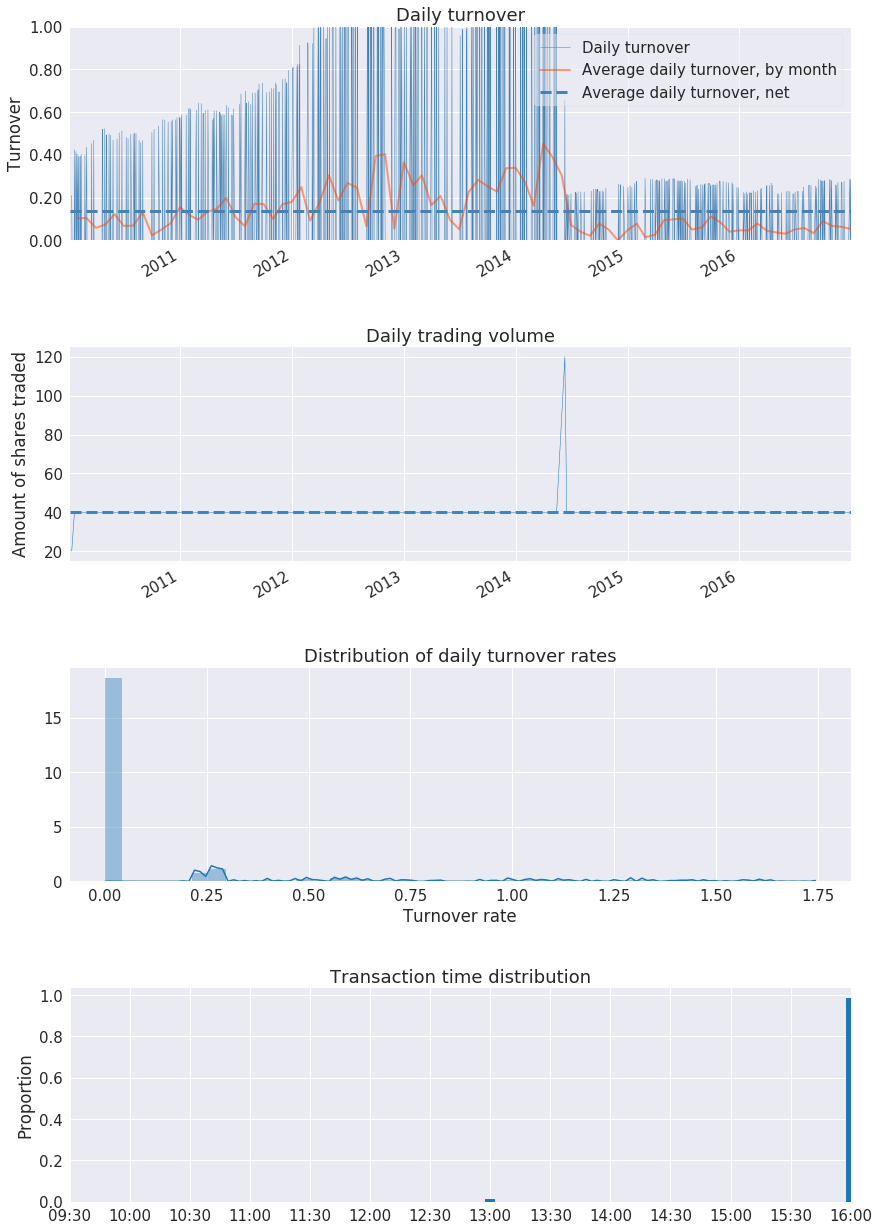

In [10]:
pf.create_full_tear_sheet(returns, positions, transactions)